# 데이터 준비
=> 데이터셋은 지원자의 소득(Income),신용 점수(Credit Score),대출 금액(Loan Amount),  
 부채 소득 비율(DTI Ratio), 고용여부(Employment Status) 등의 속성을 사용하여 대출 승인(Approval) 여부를 예측하는 데이터이다.

- 수행 작업  
=>불필요한 Text 열 제거  
=>one-Hot-Encoding으로 수치

 유형으로 변환(타겟 열 Employment_Status을 이진 값으로 변환)  
=> input 데이터와 target 데이터를 나누어 넘파이 배열로 만듬

## 프로젝트 개요 

=> 대출 신청자의 정보(소득, 신용점수, 고용 상태 등)를 바탕으로 대출 승인 여부(Approval)를 예측하는 분류 모델을 구축하고, 주요 영향을 미치는 요소들을 분석함.

---

In [41]:
import pandas as pd

data_url="C:\\Users\\채재헌\\machine_learning\\dataset\\loan_data.csv"
loan=pd.read_csv(data_url)

In [42]:
loan.head(10)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
5,I need a loan to repair my car after an accident.,108236,404,50797,10.24,employed,Rejected
6,I need financial help to cover maternity and d...,110165,570,61217,7.12,employed,Approved
7,I need money to open a small bookstore and caf챕.,40656,600,21267,113.63,unemployed,Rejected
8,I need a loan to install a security system at ...,38233,346,8467,126.42,unemployed,Rejected
9,I need a loan to cover emergency expenses afte...,81024,403,19217,36.92,unemployed,Rejected


In [43]:
loan= loan.drop(columns=["Text"])
loan.head(10)

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,employed,Rejected
1,197392,389,111604,22.14,employed,Rejected
2,44561,523,34118,45.44,employed,Rejected
3,190363,729,118757,10.22,unemployed,Rejected
4,61853,732,19210,44.13,employed,Approved
5,108236,404,50797,10.24,employed,Rejected
6,110165,570,61217,7.12,employed,Approved
7,40656,600,21267,113.63,unemployed,Rejected
8,38233,346,8467,126.42,unemployed,Rejected
9,81024,403,19217,36.92,unemployed,Rejected


In [44]:
# - one-Hot Encoding으로 수치 유형으로 변환  
# 타겟 열 Employment_Status을 이진 값으로 변환
loan["Employment_Status"]=loan["Employment_Status"].map({"employed":0,"unemployed":1})


# 결과 확인
loan.head(10)

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,0,Rejected
1,197392,389,111604,22.14,0,Rejected
2,44561,523,34118,45.44,0,Rejected
3,190363,729,118757,10.22,1,Rejected
4,61853,732,19210,44.13,0,Approved
5,108236,404,50797,10.24,0,Rejected
6,110165,570,61217,7.12,0,Approved
7,40656,600,21267,113.63,1,Rejected
8,38233,346,8467,126.42,1,Rejected
9,81024,403,19217,36.92,1,Rejected


In [45]:
loan_input=loan[["Income","Credit_Score","Loan_Amount","DTI_Ratio","Employment_Status"]] ## input 데이터 설정
loan_target=loan["Approval"] # 타겟 데이터 설정

In [46]:
loan_target[:5]

0    Rejected
1    Rejected
2    Rejected
3    Rejected
4    Approved
Name: Approval, dtype: object

In [47]:
type(loan_input)

pandas.core.frame.DataFrame

In [48]:
loan_target=loan_target.to_numpy()
loan_input=loan_input.to_numpy()

In [49]:
type(loan_input)

numpy.ndarray

In [50]:
type(loan_target)

numpy.ndarray

---

# 데이터 분할

- 수행 작업  
=> 훈련데이터와 테스트 데이터로  input 값과 target 값으로 나눔

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_input,test_input,train_target,test_target=train_test_split(loan_input,loan_target,random_state=42)

---

# 데이터 스케일링

- 수행 작업  
=>해당 훈련데이터와 테스트 데이터를 나눈 값을 스케일링 해준다.

In [53]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [54]:
train_scaled[:5]

array([[ 0.44466921,  0.93752667,  0.33114045, -0.01307517,  1.00144549],
       [ 0.31674229, -1.64311454,  0.84467927, -0.08792399,  1.00144549],
       [-0.54148815,  1.68654205,  0.58012984, -0.44948707,  1.00144549],
       [ 0.45337435,  1.01935188,  1.41887636, -0.72166458, -0.9985566 ],
       [ 0.90542279,  0.02486088,  1.90466021, -0.50515974,  1.00144549]])

---

# KNeighborsClassifier를 사용하여 모델링  


- 수행 작업  
=>KNN class를 가져와서 초기화 시키고 스케일된 KNN 모델을 생성 시킨다.    
=> 그 후  KNN모델의 훈련데이터와 테스트 데이터의 점수를 측정한다.  

- 분석 결과  
훈련데이터는 99.2의 정확도를 가졌고   
테스트 데이터는 98.8의 정확도를 가져 훈련 데이터가 과대적합 되어있음을 알수 있다.

** 참조: 이때의 KNeighborsClassifier의 최근접 이웃의 개수는 디폴트 값으로 3이다.

In [55]:
# KNN class 가져오기 
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier 초기화 
knn=KNeighborsClassifier()



#KNN 모델 생성 
knn.fit(train_scaled,train_target)


print(knn.score(train_scaled,train_target))
print(knn.score(test_scaled,test_target))


0.9922222222222222
0.988


---

## KNeighborClassifier 모델링 기법의 하이퍼파라미터를 결정

### 1. 수행 작업
1) KNeighborClassifier 모델링 기법의 최적의 성과를 달성하는 파라미터를 설정해주기 위해 최근접 이웃의 개수를 3,5,7,10,15,20으로 리스트에 저장 시킨다.  
2)  리스트에 저장된 이웃의 개수를 반복문을 통해 파라미터를 조정해가며 학습시킨다.  
3) 각각의 학습된 훈련데이터와 테스트 데이터의 정확도를 측정 후 비교    
4) matplotlib 그래프로 시각화하여  최적의 성과를 달성하는 파라미터를 비교해본다.     


---

### KNeighborsClassifier 모델링 기법의 최적의 성과를 달성하는 파라미터 설명

In [56]:
train_score=[]
test_score=[]

In [57]:
k_list=[3,5,7,10,15,20]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_scaled,train_target)
    print("n_neighbors=",k)
    print(knn.score(train_scaled,train_target))
    print(knn.score(test_scaled,test_target),"\n")
    train_score.append(knn.score(train_scaled,train_target))
    test_score.append(knn.score(test_scaled,test_target))

n_neighbors= 3
0.9937777777777778
0.9875 

n_neighbors= 5
0.9922222222222222
0.988 

n_neighbors= 7
0.9919444444444444
0.9888333333333333 

n_neighbors= 10
0.9901666666666666
0.9893333333333333 

n_neighbors= 15
0.9898333333333333
0.991 

n_neighbors= 20
0.9896666666666667
0.9901666666666666 



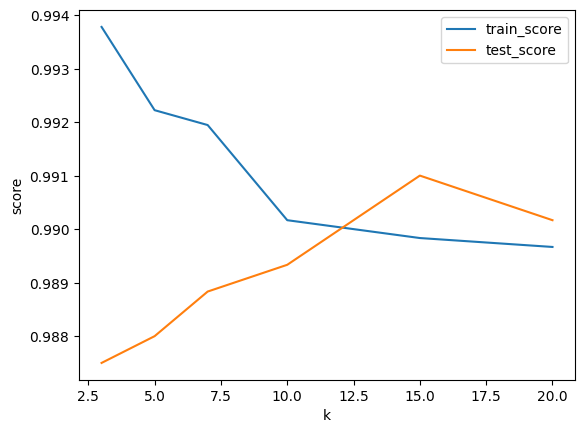

In [58]:
import matplotlib.pyplot as plt

plt.plot(k_list,train_score,label="train_score")
plt.plot(k_list,test_score,label="test_score")
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

결과  
   
    n_neighbors= 3   
    0.9937777777777778   
    0.9875     

    n_neighbors= 5   
    0.9922222222222222   
    0.988    

    n_neighbors= 7   
    0.9919444444444444   
    0.9888333333333333    

    n_neighbors= 10   
    0.9901666666666666   
    0.9893333333333333    

    n_neighbors= 15   
    0.9898333333333333   
    0.991    

    n_neighbors= 20   
    0.9896666666666667   
    0.9901666666666666    


- k=3, 5, 7, 10일 경우:
train_score가 test_score보다 더 크기 때문에 과대적합 상태로, 이는 모델이 훈련 세트에는 잘 맞지만, 테스트 세트나 실제 새로운 데이터에는 성능이 떨어질 수 있다.  
그러나 훈련 세트는 전체 데이터를 대표한다고 가정하므로, 훈련 세트를 잘 학습하는 것도 중요하므로 k=10일 때는 train_score와 test_score 간의 차이가 가장 작아, 일반화 성능이 우수한 모델이라고 판단할 수   있다. 따라서 k=10은 적절한 하이퍼파라미터로 볼 수 있다.  



- k=15, 20일 경우:  
train_score보다 test_score가 더 높게 나타나는 과소적합 상태로, 모델이 훈련 세트조차 충분히 학습하지 못한 경우이다. 이런 경우에는 모델이 너무 단순해 실전에 적합하지 않음을 알 수 있다. 

---

In [59]:
# KNN class 가져오기 
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 k : 10설정
knn=KNeighborsClassifier(n_neighbors=10)



#KNN 모델 생성 
knn.fit(train_scaled,train_target)


print(knn.score(train_scaled,train_target))
print(knn.score(test_scaled,test_target))


0.9901666666666666
0.9893333333333333


---

### 결론
 그래프와 모델링 결과를 보면, k=10일 때 가장 적절한 모델이 만들어졌음을 알 수 있다.
 
    train_score: 0.9901666666666666  
    test_score:  0.9893333333333333

---

##  모델링 결과 및 성과 지표

K-최근접 이웃(K-Nearest Neighbors, KNN) 분류기를 사용하여 대출 승인 여부를 예측하였고, 모델의 성능은 아래와 같다.

- **Accuracy (정확도)**: 0.9893333333333333  
- **Precision (정밀도, 'Rejected' 기준)**: 0.9960206923995225  
- **Recall (재현율, 'Rejected' 기준)**: 0.9912871287128713  
- **F1 Score**: 0.9936482731242556

=> 참고: pos_label="Rejected"로 설정하여 "Rejected" 클래스의 예측 성과를 집중 평가함


In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred=knn.predict(test_scaled)

acc=accuracy_score(test_target,pred)
precision = precision_score(test_target, pred, pos_label="Rejected")
recall = recall_score(test_target, pred, pos_label="Rejected")
f1 = f1_score(test_target, pred, pos_label="Rejected")

print("Accuracy:", acc)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)


Accuracy: 0.9893333333333333
Precision: 0.9960206923995225
Recall: 0.9912871287128713
F1 Score: 0.9936482731242556


---

##  1. 성과에 영향을 미친 주요 요소 분석

1. 데이터 정규화:

* KNN은 거리 기반 알고리즘이므로, 피처 값의 스케일이 동일해야 한다.

* StandardScaler를 통한 정규화가 높은 정확도와 정밀도에 크게 기여한다.

2. 적절한 K 값 설정:

* 과적합을 방지하고 일반화를 높이기 위해 적절한 k 값 선택이 중요하다.

* 본 모델은 최적의 k 값을 사용하여 높은 재현율과 정밀도를 달성하였다.

3. 데이터의 분포와 패턴:

* KNN은 데이터 분포에 민감하므로, 군집 구조가 명확한 데이터일수록 좋은 성능을 낸다.

* 본 분석 대상 데이터는 "Rejected"와 "Approved" 간 경계가 비교적 뚜렷했을 가능성이 높은것을 알 수 있다.




##  2. 결론

KNN 모델은 비교적 단순한 알고리즘이지만, 적절한 전처리와 튜닝을 통해 대출 승인 여부를 안정적으로 예측할 수 있다.  
다만 성능 향상을 위해 더 복잡한 모델이나 교차 검증 등을 활용한 추가 실험이 필요하다.
